In [2]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import plotly.express as px

In [3]:
glob("*")

['test.csv',
 '데이터톤_EDA.ipynb',
 'train.csv',
 'transactions.csv',
 'oil.csv',
 'holidays_events.csv',
 'sample_submission.csv',
 'stores.csv']

In [4]:
train = pd.read_csv('train.csv')
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
fam_list = list(train["family"].unique())
fam_list

lst = ['DELI', 'EGGS', 'POULTRY', 'GROCERY I', 'GROCERY II','SEAFOOD',
       'MEATS','DAIRY', 'PRODUCE']
# lst

fam_list

['AUTOMOTIVE',
 'BABY CARE',
 'BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HARDWARE',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LAWN AND GARDEN',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

In [6]:
# train["family"].sum()

<AxesSubplot:xlabel='family'>

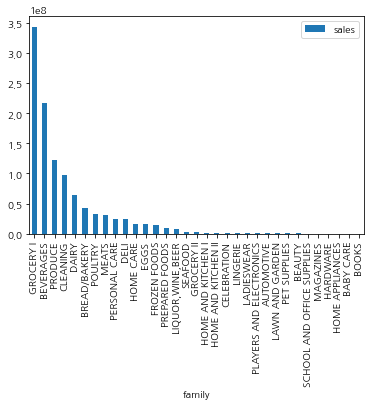

In [7]:
# 품목당 총 판매량
df_total_sales = train.groupby(["family"])["sales"].sum().to_frame().sort_values("sales", ascending = False)
df_total_sales.plot.bar()

In [8]:
df_total_sales = df_total_sales.nlargest(20 , "sales")

In [9]:
color_mapping = {}
for i in lst :
    color_mapping[i] = "red"

color_mapping

{'DELI': 'red',
 'EGGS': 'red',
 'POULTRY': 'red',
 'GROCERY I': 'red',
 'GROCERY II': 'red',
 'SEAFOOD': 'red',
 'MEATS': 'red',
 'DAIRY': 'red',
 'PRODUCE': 'red'}

<BarContainer object of 20 artists>

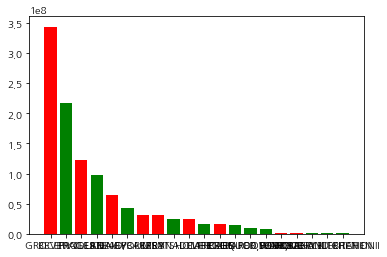

In [10]:
plt.bar(df_total_sales.index,df_total_sales.sales 
        ,color=[color_mapping.get(item, 'green') for item in df_total_sales.index])

# df_total_sales.plot.bar(color=[color_mapping.get(item, 'green') for item in df_total_sales.index])

In [11]:
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

<AxesSubplot:xlabel='date', ylabel='sales'>

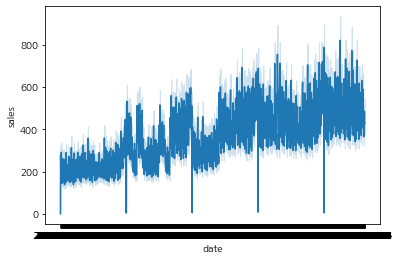

In [12]:
sns.lineplot(data= train, x ="date", y = "sales" )

# 날짜 데이터 파생변수 생성

In [13]:
# 날짜 컬럼 데이터타입 '날짜'로 변경
train["date"] = pd.to_datetime(train["date"])

# 파생변수 생성
train["year"] =  train["date"].dt.year
train["month"] =  train["date"].dt.month
train["dayofweek"] =   train["date"].dt.dayofweek
train["day"] =   train["date"].dt.day

train.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1


In [14]:
train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
year                    int64
month                   int64
dayofweek               int64
day                     int64
dtype: object

In [15]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1


# 통합 데이터프레임 만들기

<AxesSubplot:xlabel='date', ylabel='transactions'>

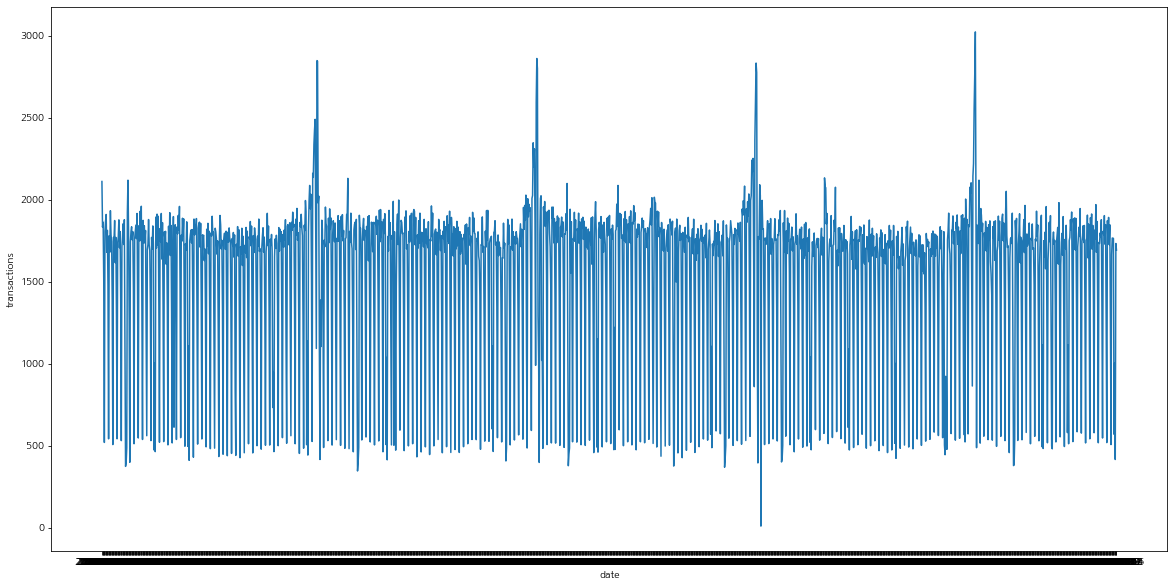

In [16]:
## transaction
plt.figure(figsize = (20,10))
transac = pd.read_csv('transactions.csv')
transasc_1 = transac.loc[transac["store_nbr"] == 1]
sns.lineplot(data = transasc_1, x = "date", y = "transactions")

## transaction

In [17]:
transac.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [18]:
transac["date"] = pd.to_datetime(transac["date"])

df_train = pd.merge(train, transac, how = "left", on = ["date","store_nbr"])

In [19]:
df_train

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,1,15,2155.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,1,15,2155.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,1,15,2155.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,1,15,2155.0


## store

In [20]:
# store 불러오기
store = pd.read_csv('stores.csv')
store.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [21]:
# train과 store를 left 병합
store = store.rename(columns = {"type" : "store_type"})

df_train = pd.merge(df_train, store, how = "left", on = "store_nbr")
df_train

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day,transactions,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,1,15,2155.0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,1,15,2155.0,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,1,15,2155.0,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,1,15,2155.0,Quito,Pichincha,B,6


In [22]:
df_train["city"].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

## holiday

In [23]:
holi = pd.read_csv('holidays_events.csv')
holi["date"] = pd.to_datetime(holi["date"])
holi = holi.rename(columns = {"type" : "holi_type"})
holi.head(2)

,date,holi_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [24]:
# train과 holi left 병합
df_train = pd.merge(df_train, holi, how = "left", on = "date")
len(df_train)

# 왜 행 수가 증가하지?
# 한날에 공휴일이 두개 있는 날이 있나?

3054348

## oil

In [25]:
# oil
oil = pd.read_csv("oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [26]:
oil["date"] = pd.to_datetime(oil["date"])
df_train = pd.merge(df_train, oil, how = "left", on = "date")

## 필요한 부분만 추출

In [27]:
# 괴야킬만 추려서 진행
df_train = df_train[df_train["city"] == "Quito"]
len(df_train)

# 최종df에서 store_type이 A,B인 것만 추출
df_train = df_train[df_train["store_type"].str.contains("A|B")]
df_train["store_nbr"].unique()

# 신선식품만 추출
df_train = df_train[df_train["family"].str.contains('DELI|EGGS|POULTRY|GROCERY I|GROCERY II|SEAFOOD|MEATS|DAIRY|PRODUCE')]
df_train["family"].unique()

array(['DAIRY', 'DELI', 'EGGS', 'GROCERY I', 'GROCERY II', 'MEATS',
       'POULTRY', 'PRODUCE', 'SEAFOOD'], dtype=object)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138834 entries, 305 to 3054347
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            138834 non-null  int64         
 1   date          138834 non-null  datetime64[ns]
 2   store_nbr     138834 non-null  int64         
 3   family        138834 non-null  object        
 4   sales         138834 non-null  float64       
 5   onpromotion   138834 non-null  int64         
 6   year          138834 non-null  int64         
 7   month         138834 non-null  int64         
 8   dayofweek     138834 non-null  int64         
 9   day           138834 non-null  int64         
 10  transactions  130239 non-null  float64       
 11  city          138834 non-null  object        
 12  state         138834 non-null  object        
 13  store_type    138834 non-null  object        
 14  cluster       138834 non-null  int64         
 15  holi_type     

In [29]:
df_train.describe()

,id,store_nbr,sales,onpromotion,year,month,dayofweek,day,transactions,cluster,dcoilwtico
count,1.388340e+05,138834.000000,138834.000000,138834.000000,138834.000000,138834.000000,138834.000000,138834.000000,130239.000000,138834.000000,95418.000000
mean,1.504567e+06,36.222222,1517.467290,7.806222,2014.842474,6.222870,3.008168,15.656943,3009.832354,10.777778,68.015874
std,8.662640e+05,14.860723,2820.865579,24.351954,1.345612,3.374263,2.001449,8.801428,1175.095598,3.909483,25.691471
min,3.050000e+02,9.000000,0.000000,0.000000,2013.000000,1.000000,0.000000,1.000000,292.000000,5.000000,26.190000
25%,7.551218e+05,20.000000,71.000000,0.000000,2014.000000,3.000000,1.000000,8.000000,2089.000000,6.000000,46.410000
50%,1.507724e+06,45.000000,462.000000,0.000000,2015.000000,6.000000,3.000000,16.000000,3003.000000,11.000000,53.430000
75%,2.255563e+06,47.000000,1305.863250,2.000000,2016.000000,9.000000,5.000000,23.000000,3817.000000,14.000000,95.810000
max,3.000887e+06,49.000000,87438.516000,252.000000,2017.000000,12.000000,6.000000,31.000000,8359.000000,16.000000,110.620000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'store_nbr'}>],
       [<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'onpromotion'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'dayofweek'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'transactions'}>,
        <AxesSubplot:title={'center':'cluster'}>,
        <AxesSubplot:title={'center':'dcoilwtico'}>]], dtype=object)

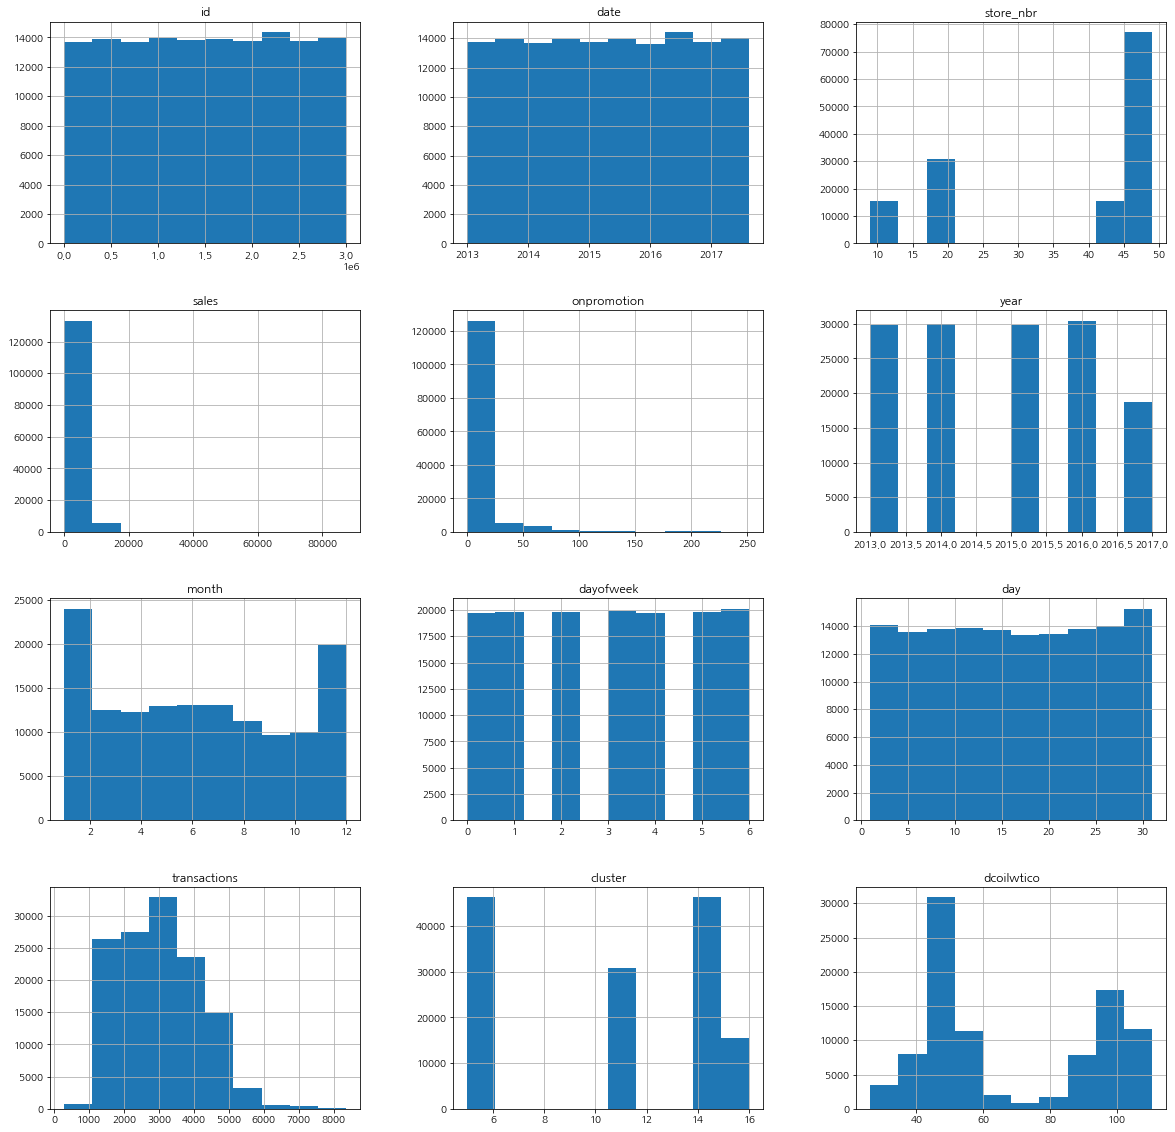

In [30]:
df_train.hist(figsize = (20,20))

In [31]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'dayofweek', 'day', 'transactions', 'city', 'state',
       'store_type', 'cluster', 'holi_type', 'locale', 'locale_name',
       'description', 'transferred', 'dcoilwtico'],
      dtype='object')

<AxesSubplot:>

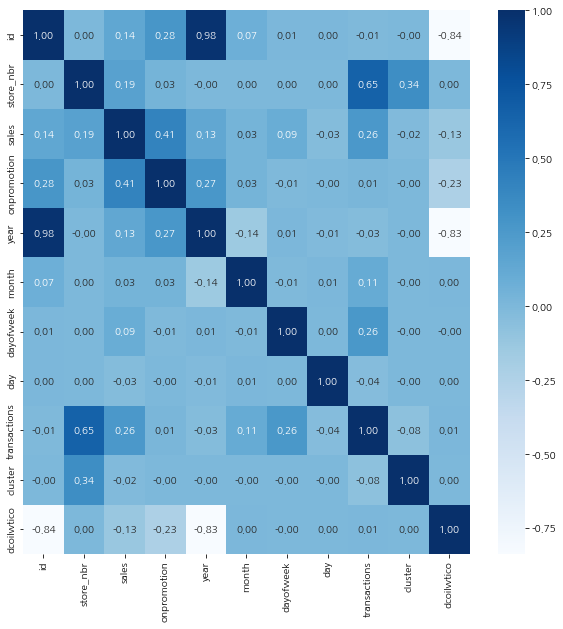

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(), annot = True,
           fmt = ".2f", cmap = "Blues")


# sales :  onpromotion, transactions => 3가지 항목을 같이 보면 좋을 것 같다.
# store_nbr : transactions, cluster => 매장타입 컬럼이 빠져있는데 매장 규모에 따른 거래량의 차이가 있지 않을까 싶다.
# dayofweek : transactions => 요일에 따른 거래량 차이가 있어 보인다.

# 시각화

## sales

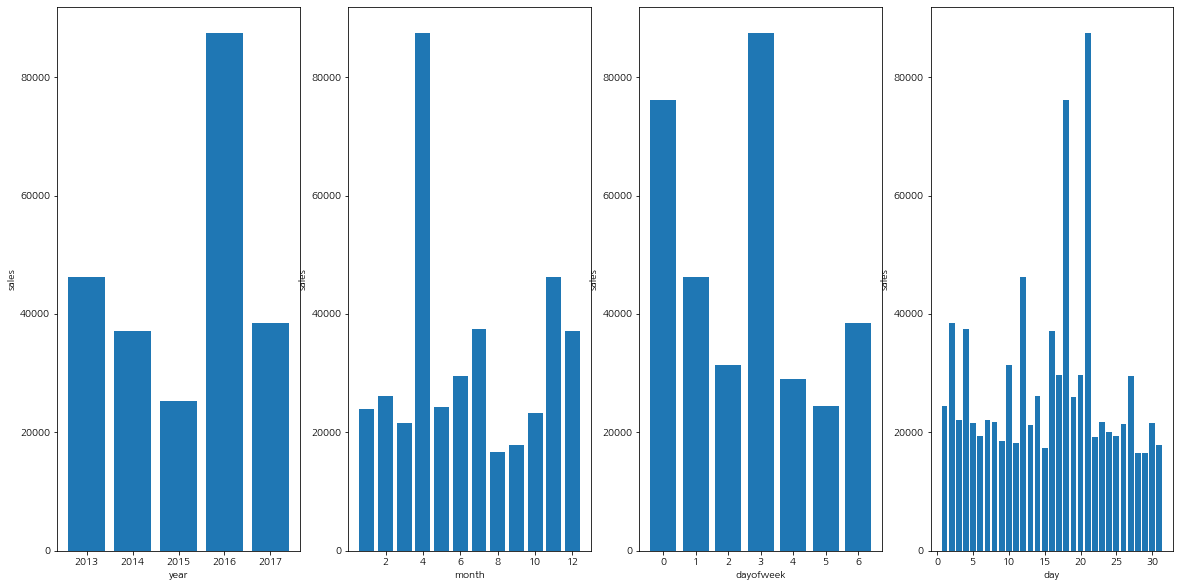

In [33]:
fig, axis = plt.subplots(1,4, figsize = (20,10))
for num, i in enumerate(["year", "month", "dayofweek", "day"]):
    axis[num].bar(df_train[i], df_train["sales"])
    axis[num].set_xlabel(i)
    axis[num].set_ylabel("sales")
    
plt.show()

# 연 : 2016년이 가장 높다
# 월 : 4월과 11월이 많았다 / 괴야킬은 12월이 높다
# 요일 : 수요일과 일요일, 월요일 순으로 높다 / 괴야킬은 목요일이 압도적으로 높았다
# 일 : 20일이 제일 많으면 15~20일 사이가 높다 / 괴야킬도 비슷한 추이를 보였다.

# 두 지역간의 지역적 차이를 보인다.

In [34]:
# 연도별, 월별, 요일별, 일별 판매량 확인
# 날짜별에 따른 프로모션 유무 확인
# 날짜별 프로모션 유무에 따른 판매량 비교

Text(0, 0.5, 'sales')

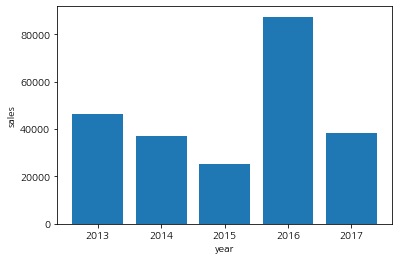

In [35]:
plt.bar(df_train["year"], df_train["sales"])
plt.xlabel("year")
plt.ylabel("sales")

In [38]:
df_train[df_train["store_type"] == "A"]

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day,...,city,state,store_type,cluster,holi_type,locale,locale_name,description,transferred,dcoilwtico
1262,1262,2013-01-01,44,DAIRY,0.000000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1263,1263,2013-01-01,44,DELI,0.000000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1264,1264,2013-01-01,44,EGGS,0.000000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1266,1266,2013-01-01,44,GROCERY I,0.000000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1267,1267,2013-01-01,44,GROCERY II,0.000000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053998,3000538,2017-08-15,49,GROCERY II,95.000000,0,2017,8,1,15,...,Quito,Pichincha,A,11,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054009,3000549,2017-08-15,49,MEATS,767.027000,0,2017,8,1,15,...,Quito,Pichincha,A,11,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054013,3000553,2017-08-15,49,POULTRY,926.492000,0,2017,8,1,15,...,Quito,Pichincha,A,11,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054015,3000555,2017-08-15,49,PRODUCE,6316.367000,10,2017,8,1,15,...,Quito,Pichincha,A,11,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


### 매장 한개를 샘플링하여 분석
- 가장 판매량이 많은 매장으로 선정
- 3개의 매장으로 분석하는 양을 줄이고 제일 일반화가 잘 되어있을 것이라고 판단

In [148]:
df_train.groupby("store_nbr")["sales"].mean().sort_values(ascending = False).to_frame()

# 상위 3개 지점만 샘플링하여 진행
# 44, 45, 47

,sales
store_nbr,
44,2479.807736
45,2189.362744
47,2027.525962
49,1760.032340
46,1681.652095
48,1443.091738
9,1062.130430
20,512.614356
18,500.988211


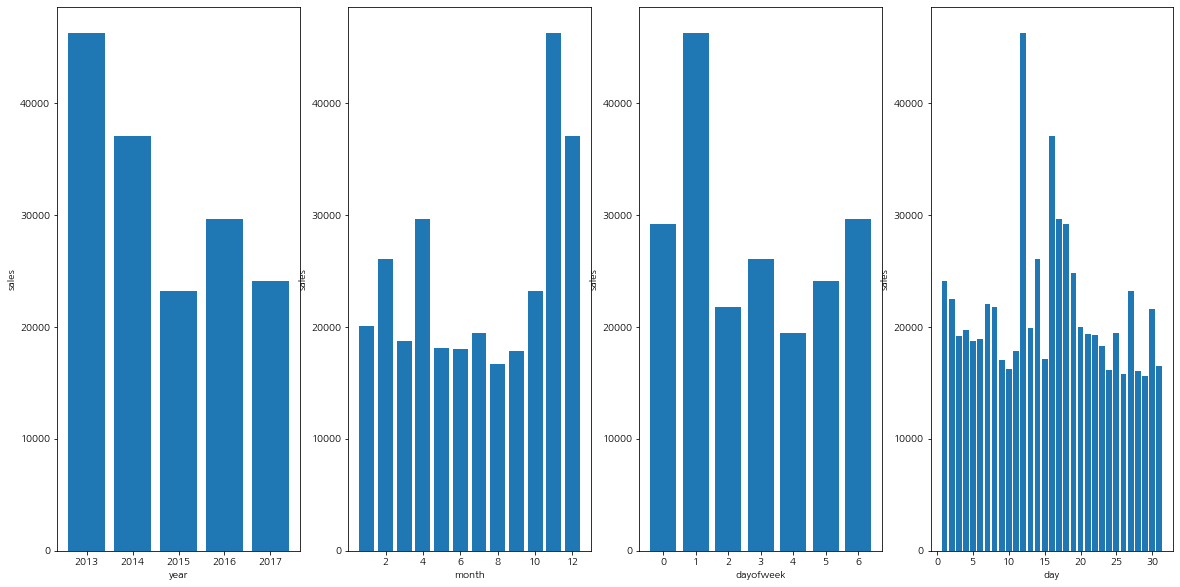

In [147]:
store_44 = df_train.loc[df_train["store_nbr"].isin([44]), :]


fig, axis = plt.subplots(1,4, figsize = (20,10))
for num, i in enumerate(["year", "month", "dayofweek", "day"]):
    axis[num].bar(store_44[i], store_44["sales"])
    axis[num].set_xlabel(i)
    axis[num].set_ylabel("sales")
    
plt.show()

In [62]:
# 데이터의 양이 너무 많아서 시간이 오래 걸린다
# store_nbr = 44을 sample로 하여 진행

sample = df_train.loc[df_train["store_nbr"].isin([44,45,47]), :]
# sample.dtypes
sample

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day,...,city,state,store_type,cluster,holi_type,locale,locale_name,description,transferred,dcoilwtico
1262,1262,2013-01-01,44,DAIRY,0.000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1263,1263,2013-01-01,44,DELI,0.000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1264,1264,2013-01-01,44,EGGS,0.000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1266,1266,2013-01-01,44,GROCERY I,0.000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1267,1267,2013-01-01,44,GROCERY II,0.000,0,2013,1,1,1,...,Quito,Pichincha,A,5,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053932,3000472,2017-08-15,47,GROCERY II,32.000,0,2017,8,1,15,...,Quito,Pichincha,A,14,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3053943,3000483,2017-08-15,47,MEATS,767.419,0,2017,8,1,15,...,Quito,Pichincha,A,14,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3053947,3000487,2017-08-15,47,POULTRY,960.400,0,2017,8,1,15,...,Quito,Pichincha,A,14,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3053949,3000489,2017-08-15,47,PRODUCE,5146.252,10,2017,8,1,15,...,Quito,Pichincha,A,14,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


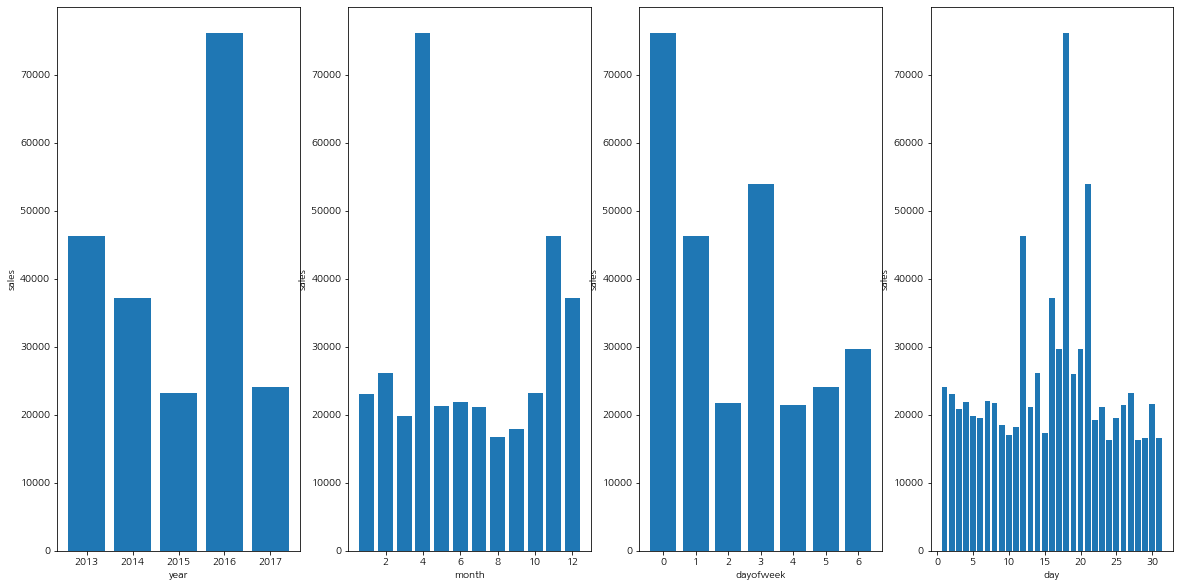

In [63]:
# store_nbr  == 44
# 연도별, 월별, 요일별, 일별 판매량 확인
fig, axis = plt.subplots(1,4, figsize = (20,10))
for num, i in enumerate(["year", "month", "dayofweek", "day"]):
    axis[num].bar(sample[i], sample["sales"])
    axis[num].set_xlabel(i)
    axis[num].set_ylabel("sales")
    
plt.show()

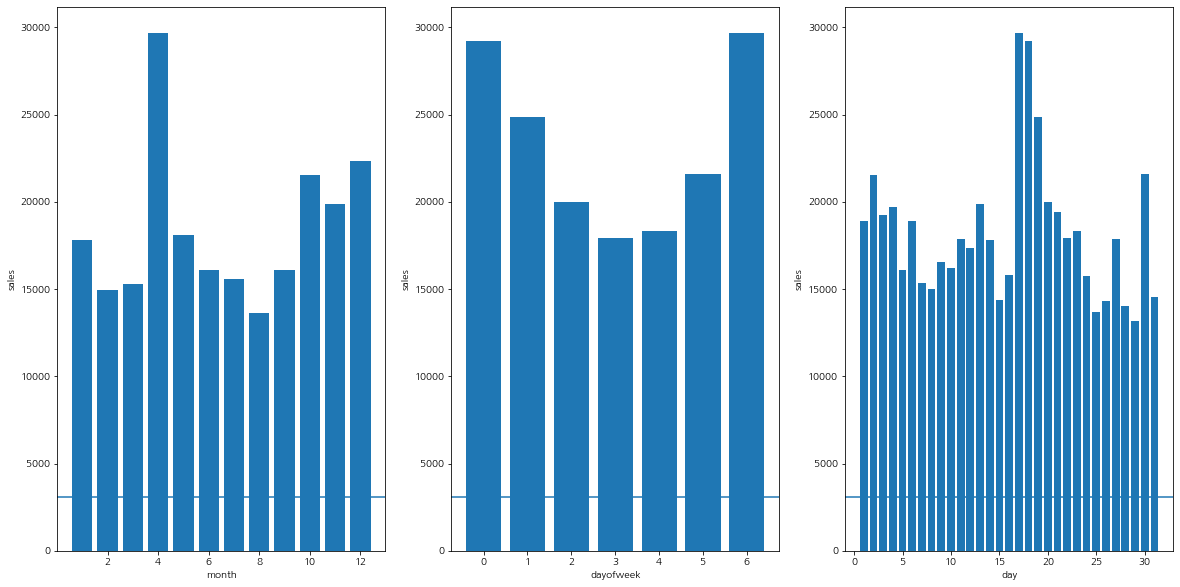

In [42]:
# 연도별, 월별, 요일별, 일별 판매량 확인
# 2016년도만 확인
fig, axis = plt.subplots(1,3, figsize = (20,10))
sam_16 = sample.loc[sample["year"] == 2016, :]
for num, i in enumerate([ "month", "dayofweek", "day"]):
      
        axis[num].bar(sam_16[i], sam_16["sales"])
        axis[num].set_xlabel(i)
        axis[num].set_ylabel("sales")
        axis[num].axhline(sam_16["sales"].mean())
plt.show()

# 월 : 4월에 가장 판매가 높다, 나머지는 연말이 높다
# 요일 :  주말로 갈수록 높다
# 일 : 15~20일 사이가 가장 높고, 30일과 월초가 높다. => 15,30일 월급날 이후 소비가 증가하는 경향


In [64]:
gb_family = df_train.groupby(["family", "date"])["sales","onpromotion", "holi_type", "dcoilwtico"].agg({"sales" : "sum","onpromotion" : "sum", "holi_type" :"count"})
gb_family

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/3373489662.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_family = df_train.groupby(["family", "date"])["sales","onpromotion", "holi_type", "dcoilwtico"].agg({"sales" : "sum","onpromotion" : "sum", "holi_type" :"count"})


sales  onpromotion  holi_type
family  date                                           
DAIRY   2013-01-01     0.000000            0          9
        2013-01-02  8712.000000            0          0
        2013-01-03  6135.000000            0          0
        2013-01-04  6536.000000            0          0
        2013-01-05  8785.000000            0          9
...                         ...          ...        ...
SEAFOOD 2017-08-11   596.164000           40          9
        2017-08-12   463.772004           12          0
        2017-08-13   508.977000            0          0
        2017-08-14   404.909003            0          0
        2017-08-15   395.020003            0          9

[15156 rows x 3 columns]

In [65]:
gb_family.index

MultiIndex([(  'DAIRY', '2013-01-01'),
            (  'DAIRY', '2013-01-02'),
            (  'DAIRY', '2013-01-03'),
            (  'DAIRY', '2013-01-04'),
            (  'DAIRY', '2013-01-05'),
            (  'DAIRY', '2013-01-06'),
            (  'DAIRY', '2013-01-07'),
            (  'DAIRY', '2013-01-08'),
            (  'DAIRY', '2013-01-09'),
            (  'DAIRY', '2013-01-10'),
            ...
            ('SEAFOOD', '2017-08-06'),
            ('SEAFOOD', '2017-08-07'),
            ('SEAFOOD', '2017-08-08'),
            ('SEAFOOD', '2017-08-09'),
            ('SEAFOOD', '2017-08-10'),
            ('SEAFOOD', '2017-08-11'),
            ('SEAFOOD', '2017-08-12'),
            ('SEAFOOD', '2017-08-13'),
            ('SEAFOOD', '2017-08-14'),
            ('SEAFOOD', '2017-08-15')],
           names=['family', 'date'], length=15156)

<AxesSubplot:xlabel='date', ylabel='sales'>

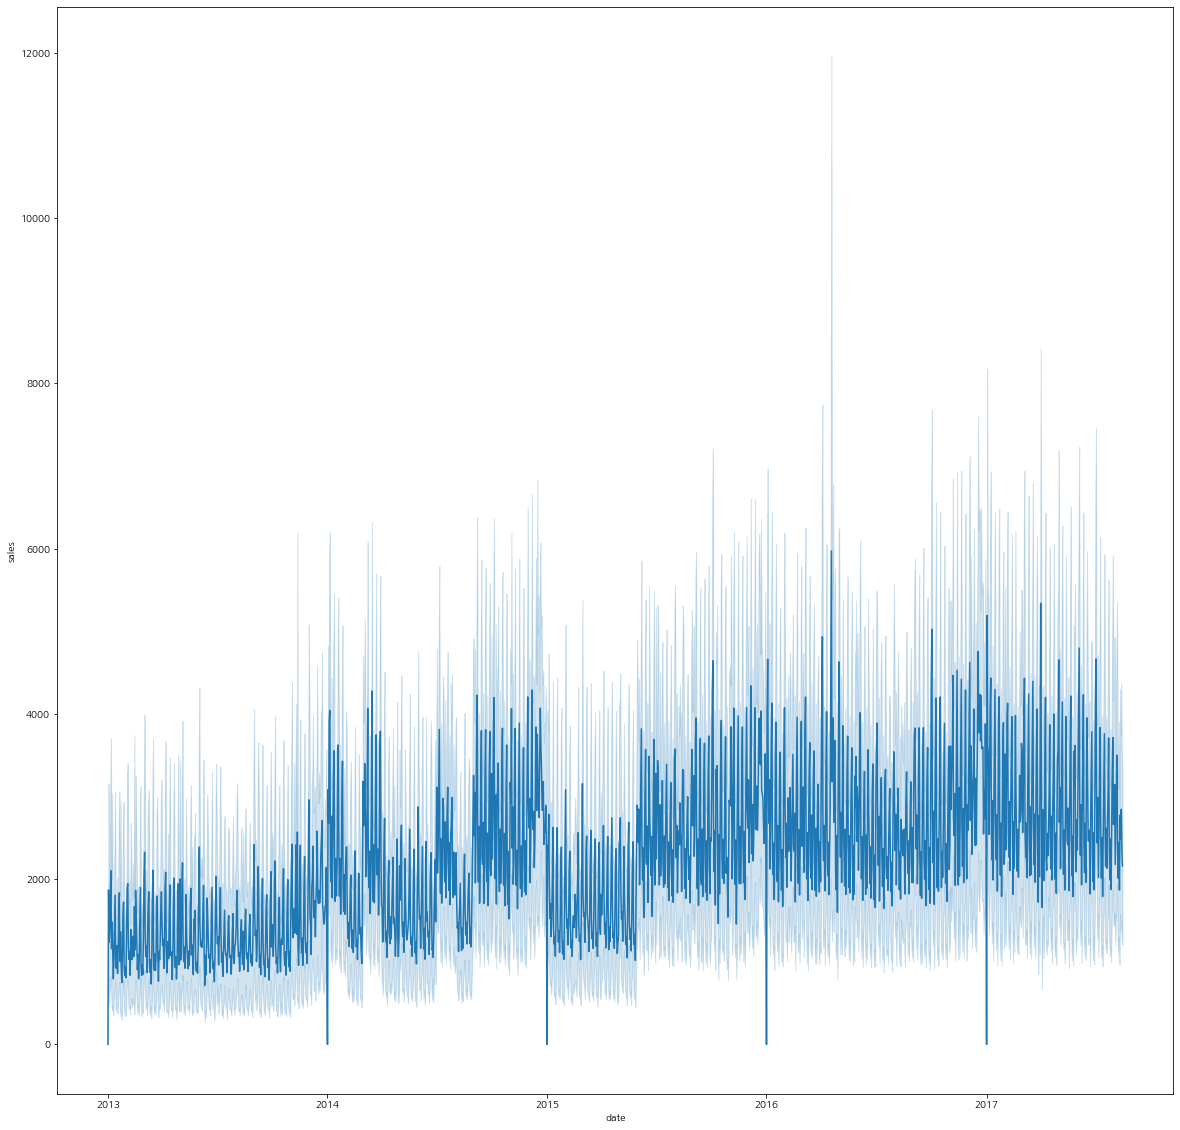

In [66]:
#  휴일 일주일 전에만 프로모션을 해야하나?
#  휴일
plt.figure(figsize = (20,20))
sns.lineplot(data = sample, x = "date", y="sales")


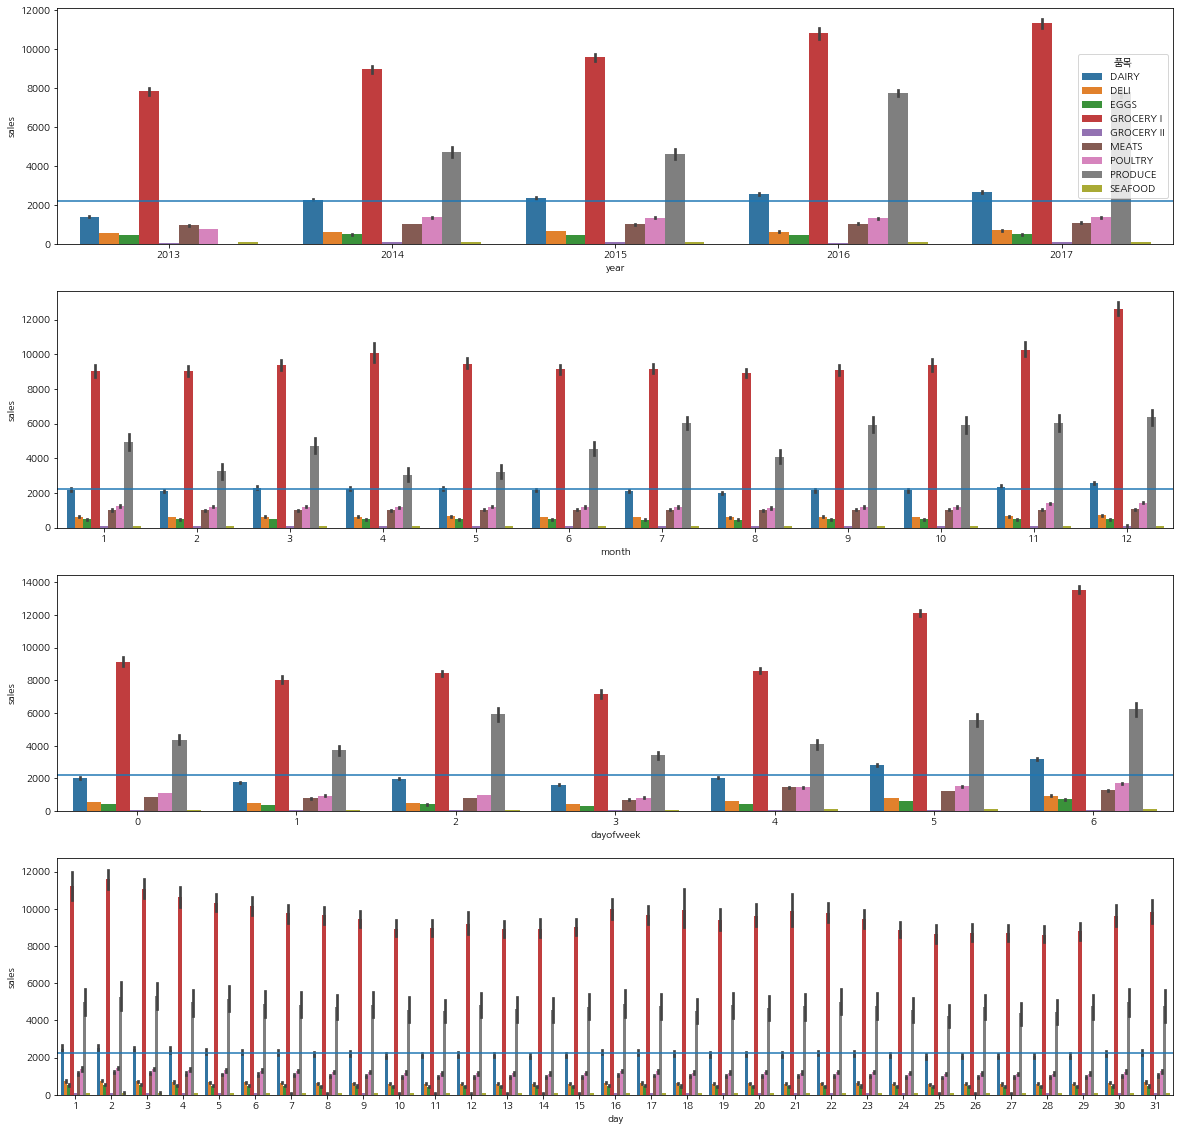

In [67]:
# 날짜별 품목의 판매량 확인
fig, axis = plt.subplots(4,1, figsize = (20,20))
for num, i in enumerate([ "year", "month", "dayofweek", "day"]):
      
        sns.barplot(data = sample, x= i, y = "sales", hue = "family", ax = axis[num])
        axis[num].set_xlabel(i)
        axis[num].set_ylabel("sales")
        axis[num].axhline(sample["sales"].mean())
        axis[num].legend_.remove()
# 하나의 범례만 표시
axis[0].legend(title='품목', loc='center right', bbox_to_anchor=(1, 0.5))

plt.show()

# 연 : dairy가 미세하게 증가하는 추세, produce가 해가 갈수록 성장
# 월 : 12월로 갈수록 Grocery1이 증가 
# 요일 : grocery1, dairy은 토요일로 갈수록 증가, produce는 화요일에 높음 
# 일 : 특이점 없음

## transaction
- 거래량

<AxesSubplot:xlabel='date', ylabel='transactions'>

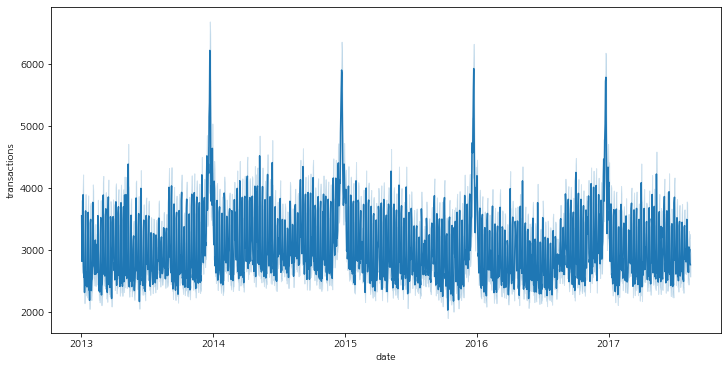

In [98]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df_train, x = "date", y = "transactions")

# 연말에 한번씩 거래량이 폭주하는 구간있음

In [81]:
# 연별 transaction 평균 시각화
gb_ytran = df_train.groupby(["year"])["transactions"].mean().reset_index()
fig1 = px.bar(gb_ytran, x = "year", y= "transactions", color = "year", title = "연도별 거래량 그래프",
      color_continuous_scale=px.colors.sequential.Viridis)
fig1.add_hline(y=gb_ytran["transactions"].mean())
fig1.show()

# 2014년에 평균보다 살짝 높음
# 판매량은 2016년, 거래량은 2014년

In [82]:
# 월별 transaction 평균 시각화
gb_ytran = df_train.groupby(["month"])["transactions"].mean().reset_index()
fig2 = px.bar(gb_ytran, x = "month", y= "transactions", color = "month", title = "월별 거래량 그래프",
      color_continuous_scale=px.colors.sequential.Viridis)
fig2.add_hline(y=gb_ytran["transactions"].mean())
fig2.show()

# 12월이 압도적으로 높다
# 판매량은 4월이 압도적, 그리고 연말이 높다
# 4월을 추가 분석할 필요성 있어 보임

In [83]:
# 요일별 transaction 평균 시각화
gb_ytran = df_train.groupby(["dayofweek"])["transactions"].mean().reset_index()
fig3 = px.bar(gb_ytran, x = "dayofweek", y= "transactions", color = "dayofweek", title = "요일별 거래량 그래프",
      color_continuous_scale=px.colors.sequential.Viridis)
fig3.add_hline(y=gb_ytran["transactions"].mean())
fig3.show()


# 판매량과 거래량 모두 주말로 갈수록 높다
# 그러나 일요일같은 경우 판매량은 높지만 거래량은 높지 않다
# 주말 프로모션을 하면 좋을듯

In [84]:
# 일별 transaction 평균 시각화
gb_ytran = df_train.groupby(["day"])["transactions"].mean().reset_index()
fig4 = px.bar(gb_ytran, x = "day", y= "transactions", color = "day", title = "일별 거래량 그래프",
      color_continuous_scale=px.colors.sequential.Viridis)
fig4.add_hline(y=gb_ytran["transactions"].mean())
fig4.show()

# 거의 비슷비슷한 거래량을 보인다
# 월초가 조금 높은 것을 보아 30일 월급날 이후에는 좀 작은 단위의 소비를 많이 하는 경향
# 15일 월급날 이후는 비교적 큰 단위의 소비를 하는 경향

In [99]:
df_train.loc[(df_train["month"] == 4), :]

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day,...,city,state,store_type,cluster,holi_type,locale,locale_name,description,transferred,dcoilwtico
160685,160685,2013-04-01,18,DAIRY,232.000,0,2013,4,0,1,...,Quito,Pichincha,B,16,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,97.1
160686,160686,2013-04-01,18,DELI,210.509,0,2013,4,0,1,...,Quito,Pichincha,B,16,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,97.1
160687,160687,2013-04-01,18,EGGS,168.000,0,2013,4,0,1,...,Quito,Pichincha,B,16,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,97.1
160689,160689,2013-04-01,18,GROCERY I,2389.000,0,2013,4,0,1,...,Quito,Pichincha,B,16,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,97.1
160690,160690,2013-04-01,18,GROCERY II,29.000,0,2013,4,0,1,...,Quito,Pichincha,B,16,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,97.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858308,2810194,2017-04-30,9,GROCERY II,6.000,2,2017,4,6,30,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN
2858319,2810205,2017-04-30,9,MEATS,415.572,0,2017,4,6,30,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN
2858323,2810209,2017-04-30,9,POULTRY,513.866,0,2017,4,6,30,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN
2858325,2810211,2017-04-30,9,PRODUCE,1762.442,8,2017,4,6,30,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN


### 12월 20일에 대한 분석

In [101]:
# a : 4월을 그룹바이한 df
a = df_train.loc[(df_train["month"] == 12), :][["year", "family", "date", "sales", "transactions", "onpromotion"]]
a

,year,family,date,sales,transactions,onpromotion
602621,2013,DAIRY,2013-12-01,950.000,1586.0,0
602622,2013,DELI,2013-12-01,350.847,1586.0,0
602623,2013,EGGS,2013-12-01,351.000,1586.0,0
602625,2013,GROCERY I,2013-12-01,5078.000,1586.0,0
602626,2013,GROCERY II,2013-12-01,39.000,1586.0,0
...,...,...,...,...,...,...
2642686,2016,GROCERY II,2016-12-31,64.000,2998.0,0
2642697,2016,MEATS,2016-12-31,278.092,2998.0,0
2642701,2016,POULTRY,2016-12-31,687.853,2998.0,1
2642703,2016,PRODUCE,2016-12-31,3091.356,2998.0,3


<AxesSubplot:>

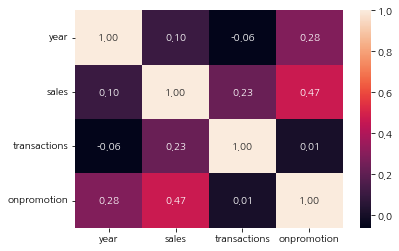

In [102]:
sns.heatmap(a.corr(), annot = True, fmt = ".2f")
# onpromotion이 판매량과는 양의 상관관계
# 판매량과 거래량이 양의 상관관계
# onpromotion이 거래량과는 관계 없음

In [89]:
# 품목별 연도에 따른 판매량, 거래량, 프로모션
yf_gb = a.groupby(["family", "year"])[ "sales", "transactions", "onpromotion"].agg(["sum", "mean"])
display(yf_gb.mean())
yf_gb

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/4022214197.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



sales         sum     19847.747299
              mean     2205.305255
transactions  sum     38231.500000
              mean     4501.569444
onpromotion   sum        70.833333
              mean        7.870370
dtype: float64

sales               transactions               \
                           sum          mean          sum         mean   
family     year                                                          
DAIRY      2013   11054.000000   1228.222222      33876.0  4234.500000   
           2014   16325.000000   1813.888889      39168.0  4896.000000   
           2015   21441.000000   2382.333333      42562.0  4729.111111   
           2016   16511.000000   1834.555556      37320.0  4146.666667   
DELI       2013    4168.051000    463.116778      33876.0  4234.500000   
           2014    5899.282000    655.475778      39168.0  4896.000000   
           2015    7822.407000    869.156333      42562.0  4729.111111   
           2016    5695.931000    632.881222      37320.0  4146.666667   
EGGS       2013    1983.000000    220.333333      33876.0  4234.500000   
           2014    2922.000000    324.666667      39168.0  4896.000000   
           2015    3619.000000    402.111111      42562.0  4729.111111   
           2016    2460.000000    273.333333      37320.0  4146.666667   
GROCERY I  2013   60587.000000   6731.888889      33876.0  4234.500000   
           2014   93369.349000  10374.372111      39168.0  4896.000000   
           2015  123914.459000  13768.273222      42562.0  4729.111111   
           2016  123449.196000  13716.577333      37320.0  4146.666667   
GROCERY II 2013     608.000000     67.555556      33876.0  4234.500000   
           2014     723.000000     80.333333      39168.0  4896.000000   
           2015     734.000000     81.555556      42562.0  4729.111111   
           2016     791.000000     87.888889      37320.0  4146.666667   
MEATS      2013    6723.054000    747.006000      33876.0  4234.500000   
           2014    6726.202000    747.355778      39168.0  4896.000000   
           2015    8351.373995    927.930444      42562.0  4729.111111   
           2016    5973.988000    663.776444      37320.0  4146.666667   
POULTRY    2013    8909.166100    989.907344      33876.0  4234.500000   
           2014    9040.845000   1004.538333      39168.0  4896.000000   
           2015   11637.913760   1293.101529      42562.0  4729.111111   
           2016    7321.743000    813.527000      37320.0  4146.666667   
PRODUCE    2013     203.000000     22.555556      33876.0  4234.500000   
           2014   42739.154000   4748.794889      39168.0  4896.000000   
           2015   57719.614000   6413.290444      42562.0  4729.111111   
           2016   43228.226900   4803.136322      37320.0  4146.666667   
SEAFOOD    2013     356.886000     39.654000      33876.0  4234.500000   
           2014     467.836006     51.981778      39168.0  4896.000000   
           2015     642.887996     71.432000      42562.0  4729.111111   
           2016     400.337000     44.481889      37320.0  4146.666667   

                onpromotion              
                        sum        mean  
family     year                          
DAIRY      2013           0    0.000000  
           2014          44    4.888889  
           2015          38    4.222222  
           2016         248   27.555556  
DELI       2013           0    0.000000  
           2014          17    1.888889  
           2015           1    0.111111  
           2016          93   10.333333  
EGGS       2013           0    0.000000  
           2014          14    1.555556  
           2015           1    0.111111  
           2016           3    0.333333  
GROCERY I  2013           0    0.000000  
           2014         133   14.777778  
           2015         112   12.444444  
           2016        1204  133.777778  
GROCERY II 2013           0    0.000000  
           2014           0    0.000000  
           2015          14    1.555556  
           2016           0    0.000000  
MEATS      2013           0    0.000000  
           2014          19    2.111111  
           2015           4    0.444444  
           2016          34    3.777778  
POUL

In [ ]:
df_train.loc[(df_train["month"] == 12)& (df_train["dayofweek"] == 4), :]

### 12월 목요일에 대한 분석

In [ ]:
# b : 12월 20일을 그룹바이한 df
b = df_train.loc[(df_train["month"] == 12)& (df_train["dayofweek"] == 4), :][["year", "family", "date", "sales", "transactions", "onpromotion"]]
b

## sales 와 transaction 관계
- 상관관계
- regplot
- 파생변수

In [ ]:
sns.heatmap(df_train[['date','store_nbr','sales', 'onpromotion','transactions']].corr(),
            annot = True, fmt = ".2f", cmap = "Reds")

# 프로모션과 판매량이 양의 상관관계
# 판매량과 거래량은 크게 상관 관계가 없음

In [ ]:
gb_sales_tran = pd.merge(df_train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transac, how = "left")
gb_sales_tran

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(data = gb_sales_tran,x ="date", y = "transactions", hue = "store_nbr")

### 시간대별 판매량과 거래량 비교

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/4098847634.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='year'>

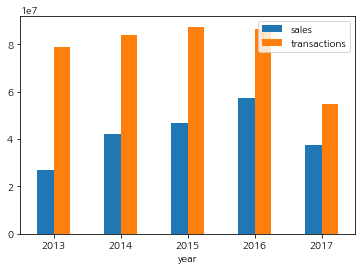

In [92]:
gb_y = df_train.groupby(["year"])["sales","transactions"].sum()
gb_y.plot.bar(rot = 0)


# 2016년까지는 비슷한 추이로 성장
# 판매량의 증가폭이 거랭량의 증가폭보다 큼
# => 사람들이 한번 거래에 구매하는 양이 많아짐
# 2017년부터는 거래량과 판매량의 갭이 크게 줄어 이 경향이 확실해짐

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/1317487493.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='month'>

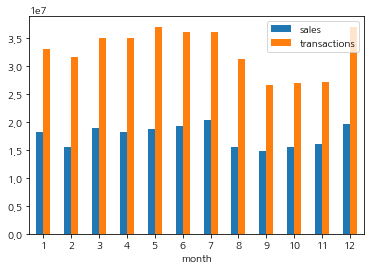

In [93]:
gb_m = df_train.groupby(["month"])["sales","transactions"].sum()
gb_m.plot.bar(rot = 0)

# 전체적인 판매량은 비슷비슷
# 거래량이 9~11에 눈에 띄게 줄음
# 9~11에 한번 거래에 구매하는 양이 많은 경향 보임

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/1192688044.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='dayofweek'>

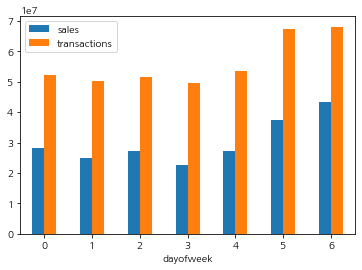

In [94]:
gb_w = df_train.groupby(["dayofweek"])["sales","transactions"].sum()
gb_w.plot.bar(rot = 0)

# 거래량과 판매량의 관계를 비슷
# 주말로 갈수록 판매 및 거래량이 증가

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/276693548.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='day'>

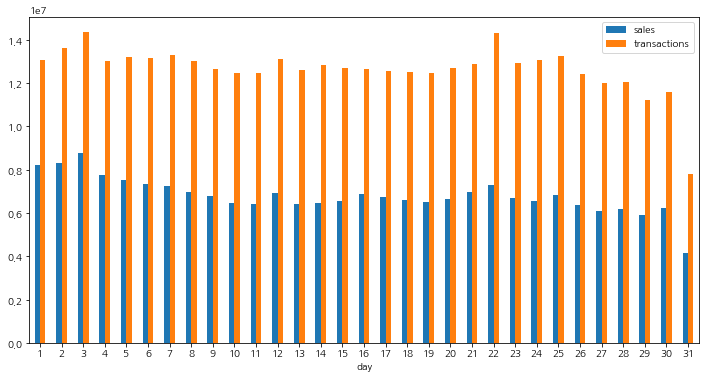

In [97]:
gb_d = df_train.groupby(["day"])["sales","transactions"].sum()
gb_d.plot.bar(rot = 0, figsize = (12,6))

# 거의 비슷한 추이
# 말일에 유독 거래및 판매가 낮음

In [ ]:
# 31일이 유독 낮은 이유 추가 분석 필요 =? 31일이 적어서(준호님)

In [145]:
df_train.loc[df_train["day"] == 31, :][""]

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek,day,...,city,state,store_type,cluster,holi_type,locale,locale_name,description,transferred,dcoilwtico
53765,53765,2013-01-31,18,DAIRY,203.000,0,2013,1,3,31,...,Quito,Pichincha,B,16,NaN,NaN,NaN,NaN,NaN,97.65
53766,53766,2013-01-31,18,DELI,136.544,0,2013,1,3,31,...,Quito,Pichincha,B,16,NaN,NaN,NaN,NaN,NaN,97.65
53767,53767,2013-01-31,18,EGGS,94.000,0,2013,1,3,31,...,Quito,Pichincha,B,16,NaN,NaN,NaN,NaN,NaN,97.65
53769,53769,2013-01-31,18,GROCERY I,1431.000,0,2013,1,3,31,...,Quito,Pichincha,B,16,NaN,NaN,NaN,NaN,NaN,97.65
53770,53770,2013-01-31,18,GROCERY II,15.000,0,2013,1,3,31,...,Quito,Pichincha,B,16,NaN,NaN,NaN,NaN,NaN,97.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027598,2974138,2017-07-31,9,GROCERY II,13.000,0,2017,7,0,31,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027609,2974149,2017-07-31,9,MEATS,357.701,0,2017,7,0,31,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027613,2974153,2017-07-31,9,POULTRY,470.513,1,2017,7,0,31,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027615,2974155,2017-07-31,9,PRODUCE,1517.552,6,2017,7,0,31,...,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21


# 품목별 시간대별 분석

## 품목별 연도별 분석

In [103]:
fy_gb = df_train.groupby(["family", "year"])['sales','transactions',  'onpromotion'].sum()
fy_gb

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/494428666.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



sales  transactions  onpromotion
family     year                                         
DAIRY      2013  2.694973e+06     8765207.0            0
           2014  4.659700e+06     9355246.0         3192
           2015  5.071549e+06     9721692.0        17629
           2016  5.747896e+06     9614218.0        54836
           2017  3.791961e+06     6098921.0        65114
DELI       2013  1.419531e+06     8765207.0            0
           2014  1.622966e+06     9355246.0        14989
           2015  1.982685e+06     9721692.0        31553
           2016  1.923328e+06     9614218.0        43860
           2017  1.336759e+06     6098921.0        35427
EGGS       2013  8.586760e+05     8765207.0            0
           2014  9.705860e+05     9355246.0         6671
           2015  9.812710e+05     9721692.0        12955
           2016  9.782820e+05     9614218.0        12912
           2017  6.571500e+05     6098921.0        10083
GROCERY I  2013  1.785031e+07     8765207.0            0
           2014  2.066062e+07     9355246.0        12391
           2015  2.384057e+07     9721692.0        41096
           2016  2.768239e+07     9614218.0       207427
           2017  1.814693e+07     6098921.0       137959
GROCERY II 2013  1.289800e+05     8765207.0            0
           2014  1.585370e+05     9355246.0           27
           2015  1.700950e+05     9721692.0          120
           2016  1.453160e+05     9614218.0          595
           2017  1.066560e+05     6098921.0          678
MEATS      2013  2.252532e+06     8765207.0            0
           2014  2.352913e+06     9355246.0        10211
           2015  2.479425e+06     9721692.0        20073
           2016  2.551591e+06     9614218.0        21369
           2017  1.643334e+06     6098921.0        17808
POULTRY    2013  1.754368e+06     8765207.0            0
           2014  2.919415e+06     9355246.0         8315
           2015  3.032782e+06     9721692.0        15974
           2016  2.985518e+06     9614218.0        17780
           2017  1.867333e+06     6098921.0        11347
PRODUCE    2013  2.732500e+04     8765207.0            0
           2014  8.426628e+06     9355246.0        31116
           2015  8.901440e+06     9721692.0        49808
           2016  1.533429e+07     9614218.0        93234
           2017  9.692383e+06     6098921.0        66344
SEAFOOD    2013  1.584799e+05     8765207.0            0
           2014  1.853614e+05     9355246.0         1247
           2015  2.019147e+05     9721692.0         2845
           2016  2.007666e+05     9614218.0         4487
           2017  1.205281e+05     6098921.0         2297

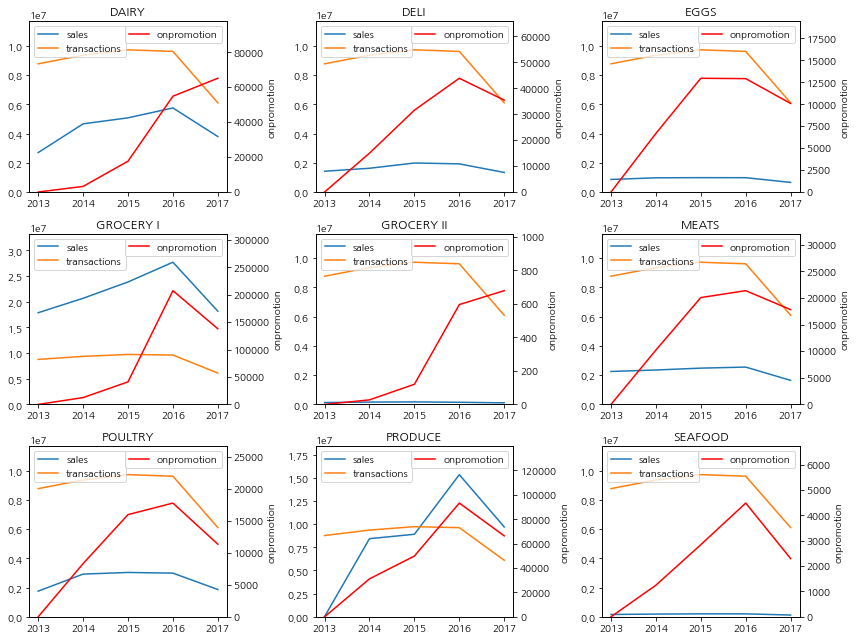

In [140]:
# Subplots 생성
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# 각 family에 대한 그래프 그리기
families_fy = fy_gb.index.get_level_values('family').unique()
for i, family in enumerate(families_fy):
    ax = axes[i // 3, i % 3]  # 서브플롯 위치 설정
    fy_family_data = fy_gb.loc[family]  # 해당 family 데이터 추출
    
    # 그래프 그리기 (sales, transactions)
    ax.plot(fy_family_data.index.get_level_values('year'), fy_family_data['sales'], label='sales')
    ax.plot(fy_family_data.index.get_level_values('year'), fy_family_data['transactions'], label='transactions')
    ax.set_title(family)
    ax.legend(loc='upper left')
    
    # y축 범위 조정 (sales, transactions)
    ax.set_ylim(bottom=0, top=max(fy_family_data[['sales', 'transactions']].max()) * 1.2)
    
    # 두 번째 축 생성 (onpromotion)
    ax2 = ax.twinx()
    
    # 그래프 그리기 (onpromotion)
    ax2.plot(fy_family_data.index.get_level_values('year'), fy_family_data['onpromotion'], color='red', label='onpromotion')
    ax2.set_ylabel('onpromotion')
    ax2.legend(loc='upper right')
    
    # y축 범위 조정 (onpromotion)
    ax2.set_ylim(bottom=0, top=fy_family_data['onpromotion'].max() * 1.5)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## 품목별 월별 분석

In [104]:
fm_gb = df_train.groupby(["family", "month"])['sales','transactions', 'onpromotion'].sum()
fm_gb

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/1636109014.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



sales  transactions  onpromotion
family  month                                         
DAIRY   1      1.927669e+06     3659889.0        12472
        2      1.724635e+06     3502303.0         8442
        3      2.079906e+06     3886496.0        16550
        4      2.013205e+06     3887226.0        11398
        5      2.123318e+06     4107839.0        14785
...                     ...           ...          ...
SEAFOOD 8      6.668916e+04     3468736.0          945
        9      6.344579e+04     2943794.0          876
        10     6.371125e+04     2984339.0          976
        11     5.975732e+04     3018243.0          813
        12     5.681603e+04     4108442.0          677

[108 rows x 3 columns]

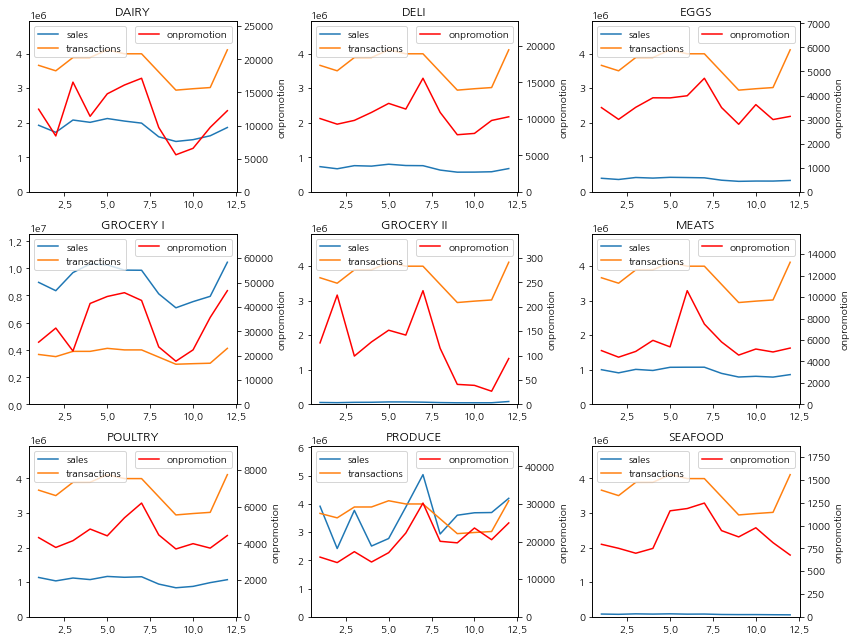

In [141]:
# Subplots 생성
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# 각 family에 대한 그래프 그리기
families_fm = fm_gb.index.get_level_values('family').unique()
for i, family in enumerate(families_fm):
    ax = axes[i // 3, i % 3]  # 서브플롯 위치 설정
    fm_family_data = fm_gb.loc[family]  # 해당 family 데이터 추출
    
    # 그래프 그리기 (sales, transactions)
    ax.plot(fm_family_data.index.get_level_values('month'), fm_family_data['sales'], label='sales')
    ax.plot(fm_family_data.index.get_level_values('month'), fm_family_data['transactions'], label='transactions')
    ax.set_title(family)
    ax.legend(loc='upper left')
    
    # y축 범위 조정 (sales, transactions)
    ax.set_ylim(bottom=0, top=max(fm_family_data[['sales', 'transactions']].max()) * 1.2)
    
    # 두 번째 축 생성 (onpromotion)
    ax2 = ax.twinx()
    
    # 그래프 그리기 (onpromotion)
    ax2.plot(fm_family_data.index.get_level_values('month'), fm_family_data['onpromotion'], color='red', label='onpromotion')
    ax2.set_ylabel('onpromotion')
    ax2.legend(loc='upper right')
    
    # y축 범위 조정 (onpromotion)
    ax2.set_ylim(bottom=0, top=fm_family_data['onpromotion'].max() * 1.5)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## 품목별 요일별 분석

In [105]:
fw_gb = df_train.groupby(["family", "dayofweek"])['sales','transactions', 'onpromotion'].sum()
fw_gb

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/763223945.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



sales  transactions  onpromotion
family  dayofweek                                         
DAIRY   0          2.913519e+06     5783800.0        13841
        1          2.553795e+06     5578868.0        13874
        2          2.725496e+06     5730961.0        54027
        3          2.321384e+06     5488841.0        13704
        4          2.754802e+06     5945103.0        14969
...                         ...           ...          ...
SEAFOOD 2          1.049303e+05     5730961.0          535
        3          8.788612e+04     5488841.0          797
        4          1.406839e+05     5945103.0         6427
        5          1.513727e+05     7465955.0         1566
        6          1.759697e+05     7561756.0          583

[63 rows x 3 columns]

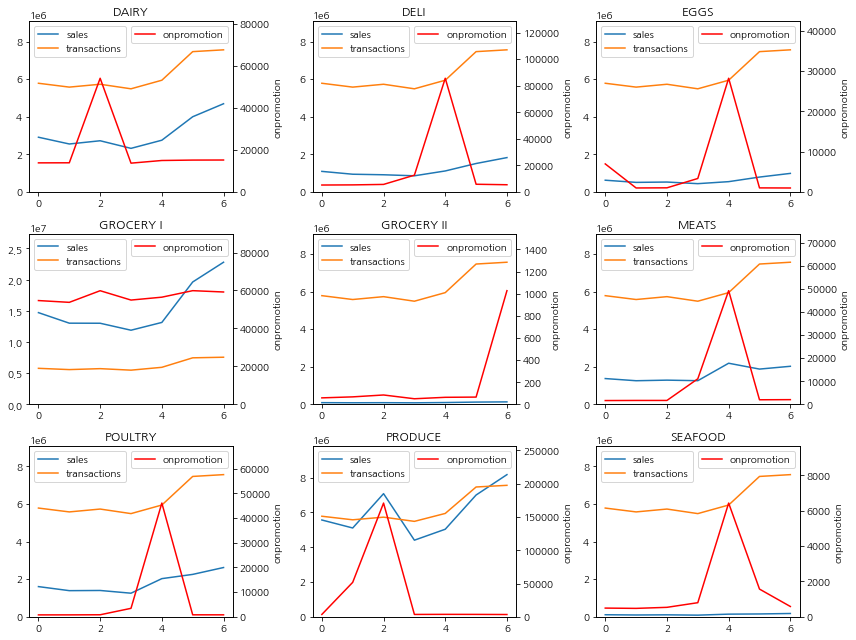

In [139]:
# Subplots 생성
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# 각 family에 대한 그래프 그리기
families_fw = fw_gb.index.get_level_values('family').unique()
for i, family in enumerate(families_fw):
    ax = axes[i // 3, i % 3]  # 서브플롯 위치 설정
    fw_family_data = fw_gb.loc[family]  # 해당 family 데이터 추출
    
    # 그래프 그리기 (sales, transactions)
    ax.plot(fw_family_data.index.get_level_values('dayofweek'), fw_family_data['sales'], label='sales')
    ax.plot(fw_family_data.index.get_level_values('dayofweek'), fw_family_data['transactions'], label='transactions')
    ax.set_title(family)
    ax.legend(loc='upper left')
    
    # y축 범위 조정 (sales, transactions)
    ax.set_ylim(bottom=0, top=max(fw_family_data[['sales', 'transactions']].max()) * 1.2)
    
    # 두 번째 축 생성 (onpromotion)
    ax2 = ax.twinx()
    
    # 그래프 그리기 (onpromotion)
    ax2.plot(fw_family_data.index.get_level_values('dayofweek'), fw_family_data['onpromotion'], color='red', label='onpromotion')
    ax2.set_ylabel('onpromotion')
    ax2.legend(loc='upper right')
    
    # y축 범위 조정 (onpromotion)
    ax2.set_ylim(bottom=0, top=fw_family_data['onpromotion'].max() * 1.5)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## 품목별 일별 분석

In [106]:
fd_gb = df_train.groupby(["family", "day"])['sales','transactions', 'onpromotion'].sum()
fd_gb

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_20338/2496606640.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



sales  transactions  onpromotion
family  day                                          
DAIRY   1    836374.000000     1452327.0         4309
        2    833755.000000     1511309.0         4545
        3    880249.000000     1594837.0         4481
        4    787728.000000     1449240.0         4403
        5    769305.000000     1468289.0         4633
...                    ...           ...          ...
SEAFOOD 27    26072.906722     1333134.0          340
        28    26376.700193     1341482.0          330
        29    24449.474077     1246105.0          327
        30    25156.131015     1288974.0          324
        31    16688.820301      864329.0          211

[279 rows x 3 columns]

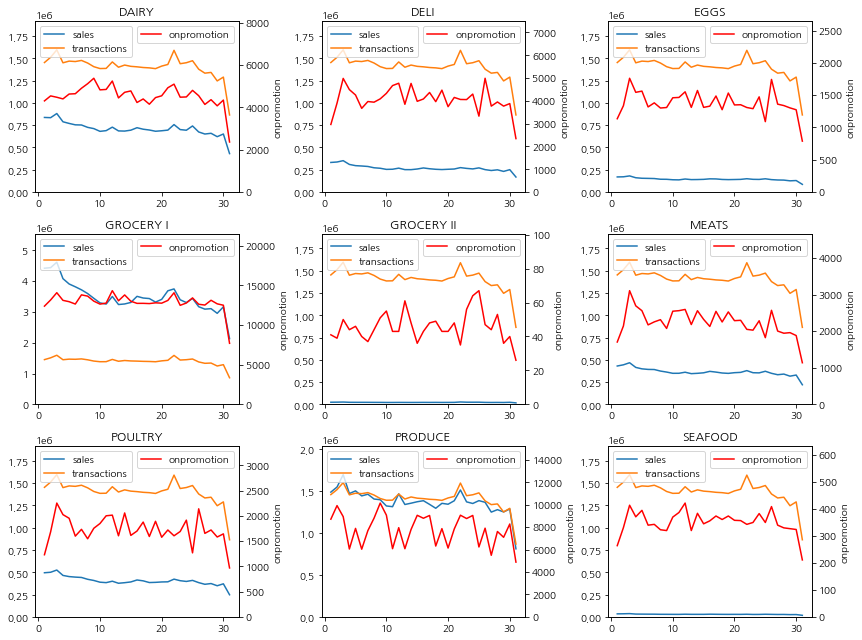

In [142]:
# Subplots 생성
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# 각 family에 대한 그래프 그리기
families_fd = fd_gb.index.get_level_values('family').unique()
for i, family in enumerate(families_fd):
    ax = axes[i // 3, i % 3]  # 서브플롯 위치 설정
    fd_family_data = fd_gb.loc[family]  # 해당 family 데이터 추출
    
    # 그래프 그리기 (sales, transactions)
    ax.plot(fd_family_data.index.get_level_values('day'), fd_family_data['sales'], label='sales')
    ax.plot(fd_family_data.index.get_level_values('day'), fd_family_data['transactions'], label='transactions')
    ax.set_title(family)
    ax.legend(loc='upper left')
    
    # y축 범위 조정 (sales, transactions)
    ax.set_ylim(bottom=0, top=max(fd_family_data[['sales', 'transactions']].max()) * 1.2)
    
    # 두 번째 축 생성 (onpromotion)
    ax2 = ax.twinx()
    
    # 그래프 그리기 (onpromotion)
    ax2.plot(fd_family_data.index.get_level_values('day'), fd_family_data['onpromotion'], color='red', label='onpromotion')
    ax2.set_ylabel('onpromotion')
    ax2.legend(loc='upper right')
    
    # y축 범위 조정 (onpromotion)
    ax2.set_ylim(bottom=0, top=fd_family_data['onpromotion'].max() * 1.5)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()